# **CNN 모델**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 데이터 전처리

In [ ]:
#train data 불러오기
import pandas as pd
filename = '/content/drive/My Drive/ai_programming/train_data.csv'
data = pd.read_csv(filename)

In [ ]:
####이진 분류의 경우의 라벨인코딩(욕설을 1, 나머지는 0)
data.loc[(data['type'] == "IMMORAL_NONE"), 'type'] = 0 #도덕, 무도덕 => 0
data.loc[(data['type'] == "DISCRIMINATION"), 'type'] = 0 #차별 => 0
data.loc[(data['type'] == "SEXUAL"), 'type'] = 0 #선정 => 0
data.loc[(data['type'] == "VIOLENCE"), 'type'] = 0 #폭력 => 0
data.loc[(data['type'] == "ABUSE"), 'type'] = 1 #욕설 => 1

In [ ]:
####다중 분류의 경우의 라벨인코딩
data.loc[(data['type'] == "IMMORAL_NONE"), 'type'] = 0 #도덕, 무도덕 => 0
data.loc[(data['type'] == "DISCRIMINATION"), 'type'] = 1 #차별 => 1
data.loc[(data['type'] == "SEXUAL"), 'type'] = 2 #선정 => 2
data.loc[(data['type'] == "VIOLENCE"), 'type'] = 3 #폭력 => 3
data.loc[(data['type'] == "ABUSE"), 'type'] = 4 #욕설 => 4

In [ ]:
data['type'] = data['type'].astype(int)

In [ ]:
#val data 불러오기
filename = '/content/drive/My Drive/ai_programming/val_data.csv'
data2 = pd.read_csv(filename)

In [ ]:
####이진 분류일 경우의 라벨인코딩(욕설을 1, 나머지는 0)
data2.loc[(data2['type'] == "IMMORAL_NONE"), 'type'] = 0 #도덕, 무도덕 => 0
data2.loc[(data2['type'] == "DISCRIMINATION"), 'type'] = 0 #차별 => 0
data2.loc[(data2['type'] == "SEXUAL"), 'type'] = 0 #선정 => 0
data2.loc[(data2['type'] == "VIOLENCE"), 'type'] = 0 #폭력 => 0
data2.loc[(data2['type'] == "ABUSE"), 'type'] = 1 #욕설 => 1

In [ ]:
####다중 분류일 경우의 라벨인코딩
data2.loc[(data2['type'] == "IMMORAL_NONE"), 'type'] = 0 #도덕, 무도덕 => 0
data2.loc[(data2['type'] == "DISCRIMINATION"), 'type'] = 1 #차별 => 1
data2.loc[(data2['type'] == "SEXUAL"), 'type'] = 2 #선정 => 2
data2.loc[(data2['type'] == "VIOLENCE"), 'type'] = 3 #폭력 => 3
data2.loc[(data2['type'] == "ABUSE"), 'type'] = 4 #욕설 => 4

In [ ]:
data2['type'] = data2['type'].astype(int)

In [ ]:
#input과 target으로 나누기
x_train = data['text']
y_train = data['type']
x_val = data2['text']
y_val = data2['type']

In [ ]:
#토큰화
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)
encoded = tokenizer.texts_to_sequences(x_train)

In [ ]:
tokenizer2 = Tokenizer()
tokenizer2.fit_on_texts(x_val)
encoded2 = tokenizer2.texts_to_sequences(x_val)

In [ ]:
max_len = max(len(item) for item in encoded2)
print('최대 길이 :',max_len)

최대 길이 : 68


In [ ]:
#zero padding
for sentence in encoded:
    while len(sentence) < max_len:
        sentence.append(0)

padded_np = np.array(encoded)
padded_np

array([[   489,  56338,     50, ...,      0,      0,      0],
       [   229,     11,    186, ...,      0,      0,      0],
       [ 31713,    108,   4832, ...,      0,      0,      0],
       ...,
       [   103,      6, 155600, ...,      0,      0,      0],
       [     1,    700, 155603, ...,      0,      0,      0],
       [    19,      1,    763, ...,      0,      0,      0]])

In [ ]:
for sentence in encoded2:
    while len(sentence) < max_len:
        sentence.append(0)

padded_np2 = np.array(encoded2)
padded_np2

array([[   33,  8971,  1026, ...,     0,     0,     0],
       [ 2325,    99,  8973, ...,     0,     0,     0],
       [   38,   326,  8976, ...,     0,     0,     0],
       ...,
       [   73,  8873,  4299, ...,     0,     0,     0],
       [ 2013, 31825,     5, ...,     0,     0,     0],
       [   15, 31828,  1478, ...,     0,     0,     0]])

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

#모델 구축 
model = Sequential()
model.add(keras.layers.Embedding(500, 68, input_length=max_len)) 
model.add(layers.Conv1D(68,1, activation='relu')) 
model.add(layers.MaxPool1D(3))  
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(2, activation='sigmoid'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 68, 68)            34000     
                                                                 
 conv1d_6 (Conv1D)           (None, 68, 68)            4692      
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 22, 68)           0         
 1D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 1496)              0         
                                                                 
 dense_12 (Dense)            (None, 100)               149700    
                                                                 
 dense_13 (Dense)            (None, 2)                 202       
                                                      

# 하이퍼 파라미터 튜닝(Grid Search)

In [ ]:
# 그리드 서치의 결과를 출력할 함수 정의
def display_cv_results(search_results):
    print('Best score = {:.4f} using {}'.format(search_results.best_score_, search_results.best_params_))
    means = search_results.cv_results_['mean_test_score']
    stds = search_results.cv_results_['std_test_score']
    params = search_results.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print('mean test accuracy +/- std = {:.4f} +/- {:.4f} with: {}'.format(mean, stdev, param))    

In [ ]:
#start=time()
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

# KerasClassifier에 요구되는 모델을 생성하는 함수 정의
# the function takes drop_out rate as argument so we can optimize it  
def create_mlp_model(dropout_rate=0):
    # create model
    model = Sequential()
    model.add(keras.layers.Embedding(500, 68, input_length=max_len)) 
    model.add(layers.Conv1D(68,1, activation='relu')) 
    model.add(layers.Flatten())
    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.Dense(5, activation='sigmoid'))
    
    # Compile model
    model.compile( 
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy'],
        )    
    return model

In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier


# create model
model = KerasClassifier(build_fn=create_mlp_model, verbose=1)
# define parameters and values for grid search 
param_grid = {
    'batch_size': [16, 32, 64, 128],
    'epochs': [10]
}

#Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(padded_np, y_train)  # fit the full dataset as we are using cross validation 

# print out results
display_cv_results(grid_result)

<ipython-input-31-27f6429b4267>:6: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_mlp_model, verbose=1)
/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Epoch 1/10
891/891 [==============================] - 7s 4ms/step - loss: 1.3717 - accuracy: 0.4270
Epoch 2/10
891/891 [==============================] - 3s 4ms/step - loss: 1.3040 - accuracy: 0.4641
Epoch 3/10
891/891 [==============================] - 3s 4ms/step - loss: 1.2924 - accuracy: 0.4690
Epoch 4/10
891/891 [==============================] - 3s 4ms/step - loss: 1.2857 - accuracy: 0.4715
Epoch 5/10
891/891 [==============================] - 3s 4ms/step - loss: 1.2792 - accuracy: 0.4745
Epoch 6/10
891/891 [==============================] - 3s 4ms/step - loss: 1.2747 - accuracy: 0.4759
Epoch 7/10
891/891 [==============================] - 3s 4ms/step - loss: 1.2691 - accuracy: 0.4783
Epoch 8/10
891/891 [==============================] - 3s 4ms/step - loss: 1.2633 - accuracy: 0.4797
Epoch 9/10
891/891 [==============================] - 3s 4ms/step - loss: 1.2588 - accuracy: 0.4834
Epoch 10/10
891/891 [==============================] - 3s 4ms/step - loss: 1.2541 - accuracy: 0.4839

-> 최적의 하이퍼 파라미터는 'batch_size': 128, 'epochs': 10 이다.

# 모델 훈련

2


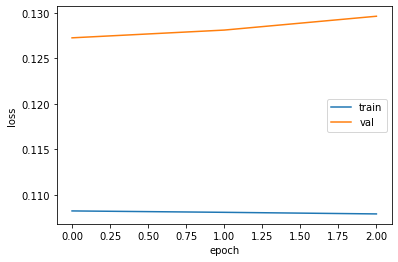

396/396 [==============================] - 1s 3ms/step - loss: 0.1272 - accuracy: 0.8490


[0.12724316120147705, 0.8490327596664429]

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(padded_np, y_train, epochs=20, verbose=0, batch_size=64, validation_data=(padded_np2, y_val), callbacks=[checkpoint_cb, early_stopping_cb])

print(early_stopping_cb.stopped_epoch)

#train, val loss 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

#성능 확인
model.evaluate(padded_np2, y_val)